In [1]:
# cyclistic bike share case study

In [2]:
# loading libraries 

import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading data sets (year 2022 dataset)

jan = pd.read_csv(r"/Users/glen/Desktop/project/202201-divvy-tripdata.csv")
feb = pd.read_csv(r"/Users/glen/Desktop/project/202202-divvy-tripdata.csv")
march = pd.read_csv(r"/Users/glen/Desktop/project/202203-divvy-tripdata.csv")
april = pd.read_csv(r"/Users/glen/Desktop/project/202204-divvy-tripdata.csv")
may = pd.read_csv(r"/Users/glen/Desktop/project/202205-divvy-tripdata.csv")
june = pd.read_csv(r"/Users/glen/Desktop/project/202206-divvy-tripdata.csv")
july = pd.read_csv(r"/Users/glen/Desktop/project/202207-divvy-tripdata.csv")
aug = pd.read_csv(r"/Users/glen/Desktop/project/202208-divvy-tripdata.csv")
sep = pd.read_csv(r"/Users/glen/Desktop/project/202209-divvy-publictripdata.csv")
oct = pd.read_csv(r"/Users/glen/Desktop/project/202210-divvy-tripdata.csv")
nov = pd.read_csv(r"/Users/glen/Desktop/project/202211-divvy-tripdata.csv")
dec = pd.read_csv(r"/Users/glen/Desktop/project/202212-divvy-tripdata.csv")

In [4]:
# data exploration (overview of the data)

jan.head(8) 
# shows the first eight rows plus the column names 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member


In [5]:
may.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.891466,-87.626761,41.943670,-87.648950,member
1,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.880958,-87.616743,41.886349,-87.617517,member


In [6]:
# transforming the datasets 

In [7]:
# concating all the datasets into a singular one ( by using concat() )

biketrip = pd.concat([jan,feb,march,april,may,june,july,aug,sep,oct,nov,dec])

In [8]:
biketrip.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member
8,154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.861251,-87.656500,41.883380,-87.641170,member
9,72DC25B2DD467EEF,classic_bike,2022-01-28 15:27:53,2022-01-28 15:35:16,LaSalle St & Jackson Blvd,TA1309000004,Clinton St & Washington Blvd,WL-012,41.878166,-87.631929,41.883380,-87.641170,member


In [9]:
# dataset summary 

biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


In [10]:
# cleaning dataset 

In [11]:
# checking null values 

biketrip.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [12]:
# removing unwanted columns 

biketrip = biketrip.drop(columns = ['start_station_name','start_station_id',
                                    'end_station_name','end_station_id',
                                    'start_lat','start_lng','end_lat','end_lng'
                                    ])

In [13]:
biketrip.head(2)

,ride_id,rideable_type,started_at,ended_at,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual


In [14]:
biketrip.isnull().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
dtype: int64

In [15]:
# checking duplicated values

biketrip.duplicated().sum()

0

In [16]:
# data transformation 

In [17]:
# creating or transforming columns 

In [18]:
# transforming the started and ended at time columns

biketrip['ended_at'] = pd.to_datetime(biketrip['ended_at'])

In [19]:
biketrip['started_at'] = pd.to_datetime(biketrip['started_at'])

In [20]:
biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5667717 entries, 0 to 181805
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 259.4+ MB


In [21]:
biketrip.head(2)

,ride_id,rideable_type,started_at,ended_at,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual


In [22]:
# bike trip ride duration

biketrip['ride_duration'] = (biketrip['ended_at'] - biketrip['started_at'])/datetime.timedelta(minutes=1)

In [23]:
biketrip['ride_duration'] = biketrip['ride_duration'].astype('int32')

In [24]:
# checking for any negative or zero values in ride_duration and removing them
biketrip[biketrip['ride_duration']<= 0].count() 

ride_id          121089
rideable_type    121089
started_at       121089
ended_at         121089
member_casual    121089
ride_duration    121089
dtype: int64

In [25]:
biketrip = biketrip.drop(biketrip[biketrip.ride_duration <= 0].index)

In [26]:
biketrip[biketrip['ride_duration']<= 0].count() 

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
ride_duration    0
dtype: int64

In [27]:
biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4764813 entries, 0 to 181805
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   ride_duration  int32         
dtypes: datetime64[ns](2), int32(1), object(3)
memory usage: 236.3+ MB


In [28]:
biketrip.head(2)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4


In [29]:
# hour column

biketrip['hour'] = biketrip['started_at'].dt.hour

In [30]:
biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4764813 entries, 0 to 181805
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   ride_duration  int32         
 6   hour           int32         
dtypes: datetime64[ns](2), int32(2), object(3)
memory usage: 254.5+ MB


In [31]:
biketrip.head(2)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration,hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4,8


In [32]:
# day of the week 

biketrip['day'] = biketrip['started_at'].dt.day_name()

In [33]:
biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4764813 entries, 0 to 181805
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   ride_duration  int32         
 6   hour           int32         
 7   day            object        
dtypes: datetime64[ns](2), int32(2), object(4)
memory usage: 290.8+ MB


In [34]:
biketrip.head(2)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration,hour,day
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2,11,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4,8,Monday


In [35]:
# month 

biketrip['month'] = biketrip['started_at'].dt.month_name()

In [36]:
biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4764813 entries, 0 to 181805
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   ride_duration  int32         
 6   hour           int32         
 7   day            object        
 8   month          object        
dtypes: datetime64[ns](2), int32(2), object(5)
memory usage: 327.2+ MB


In [37]:
biketrip.head(2)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration,hour,day,month
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2,11,Thursday,January
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4,8,Monday,January


In [38]:
# season

def seasonal(month):
    if (month >= 3) and (month <= 5):
        return 'Spring'
    elif (month >= 6) and (month <= 8):
        return 'Summer'
    elif (month >= 9) and (month <= 11):
        return 'Autumn'
    else:
        return 'Winter'

In [39]:
biketrip['season'] = biketrip['started_at'].dt.month.map(seasonal)

In [40]:
biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4764813 entries, 0 to 181805
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   rideable_type  object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   member_casual  object        
 5   ride_duration  int32         
 6   hour           int32         
 7   day            object        
 8   month          object        
 9   season         object        
dtypes: datetime64[ns](2), int32(2), object(6)
memory usage: 363.5+ MB


In [41]:
biketrip.head(2)

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_duration,hour,day,month,season
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,casual,2,11,Thursday,January,Winter
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,casual,4,8,Monday,January,Winter


In [42]:
# renaming some column names 

biketrip.rename ({'rideable_type' : 'ride_type', 'member_casual' : 'membership' }, axis = 1, inplace = True)

In [43]:
biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4764813 entries, 0 to 181805
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        object        
 1   ride_type      object        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   membership     object        
 5   ride_duration  int32         
 6   hour           int32         
 7   day            object        
 8   month          object        
 9   season         object        
dtypes: datetime64[ns](2), int32(2), object(6)
memory usage: 363.5+ MB


In [44]:
# analysing data 

In [45]:
# average ride duration (memberships)
ard = biketrip.groupby('membership', as_index = True)[['ride_duration']].mean()
ard

,ride_duration
membership,
casual,29.386725
member,12.534690


In [46]:
# total rides(memberships)
pd.pivot_table(biketrip,
              index = 'membership',
               values = 'ride_id',
              aggfunc = ['count'],
              margins = True, 
              margins_name = 'total number of rides per membership')

,count
,ride_id
membership,
casual,1966863
member,2797950
total number of rides per membership,4764813


In [47]:
# type of rides used (memberships)

pd.pivot_table(biketrip,
              index = ['ride_type','membership'],
              values ='ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'total ride_types used per membership')

count
                                                 ride_id
ride_type                            membership         
classic_bike                         casual       757392
                                     member      1432509
docked_bike                          casual       151442
electric_bike                        casual      1058029
                                     member      1365441
total ride_types used per membership             4764813

In [48]:
# rides per month

pd.pivot_table(biketrip,
              index = ['month','membership'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'total rides per month')

count
                                  ride_id
month                 membership         
April                 casual       104462
                      member       200253
August                casual       307829
                      member       367804
December              casual        35418
                      member       107775
February              casual        16310
                      member        72149
January               casual        14072
                      member        65237
July                  casual       352411
                      member       358619
June                  casual       316647
                      member       343101
March                 casual        72049
                      member       155659
May                   casual       237451
                      member       297854
November              casual        82026
                      member       192991
October               casual       176130
                      member       293207
September             casual       252058
                      member       343301
total rides per month             4764813

In [49]:
# rides per season

pd.pivot_table(biketrip,
              index = ['membership','season'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'total rides per season')

count
                               ride_id
membership             season         
casual                 Autumn   510214
                       Spring   413962
                       Summer   976887
                       Winter    65800
member                 Autumn   829499
                       Spring   653766
                       Summer  1069524
                       Winter   245161
total rides per season         4764813

In [50]:
# rides per day 

pd.pivot_table(biketrip,
              index = ['day','membership'],
              values = 'ride_id',
              aggfunc = ['count'],
              margins = True,
              margins_name = 'total rides per day')

count
                                ride_id
day                 membership         
Friday              casual       283716
                    member       391387
Monday              casual       234850
                    member       395365
Saturday            casual       401173
                    member       370892
Sunday              casual       329874
                    member       323788
Thursday            casual       261804
                    member       445200
Tuesday             casual       223155
                    member       433425
Wednesday           casual       232291
                    member       437893
total rides per day             4764813

In [51]:
# average ride duration(membership)

pd.pivot_table(biketrip,
              index = 'membership',
              values = 'ride_duration',
              aggfunc = ['mean'],
              margins = True,
              margins_name = 'overall average ride duration')

,mean
,ride_duration
membership,
casual,29.386725
member,12.534690
overall average ride duration,19.491027


In [52]:
# average ride per day(membership)

pd.pivot_table(biketrip,
              index = ['membership', 'day'],
              values = 'ride_duration',
              aggfunc = ['mean'],
              margins = True,
              margins_name = 'overall average')

mean
                          ride_duration
membership      day                    
casual          Friday        28.292465
                Monday        29.648631
                Saturday      32.820073
                Sunday        34.396297
                Thursday      25.592997
                Tuesday       26.128140
                Wednesday     24.821074
member          Friday        12.340083
                Monday        12.045472
                Saturday      14.053795
                Sunday        13.900771
                Thursday      12.093884
                Tuesday       11.935927
                Wednesday     11.894371
overall average               19.491027

In [53]:
#average ride per month(membership)

pd.pivot_table(biketrip,
              index = ['membership', 'month'],
              values = 'ride_duration',
              aggfunc = ['mean'],
              margins = True,
              margins_name = 'overall average')

mean
                          ride_duration
membership      month                  
casual          April         29.823965
                August        29.313739
                December      23.292450
                February      24.586634
                January       34.206509
                July          29.529087
                June          32.339441
                March         32.212161
                May           30.887644
                November      21.644405
                October       27.024930
                September     28.232454
member          April         11.244241
                August        13.228113
                December      10.410596
                February      11.139822
                January       11.799654
                July          13.506457
                June          13.820353
                March         11.661414
                May           13.134408
                November      10.898809
                October       11.755429
                September     12.804953
overall average               19.491027

In [54]:
# average rides per season(membership)

pd.pivot_table(biketrip,
              index = ['membership', 'season'],
              values = 'ride_duration',
              aggfunc = ['mean'],
              margins = True,
              margins_name = 'overall average')

mean
                       ride_duration
membership      season              
casual          Autumn     26.756461
                Spring     30.849757
                Summer     30.372173
                Winter     25.947325
member          Autumn     11.990489
                Spring     12.204723
                Summer     13.511433
                Winter     10.994828
overall average            19.491027

In [55]:
# visualising  

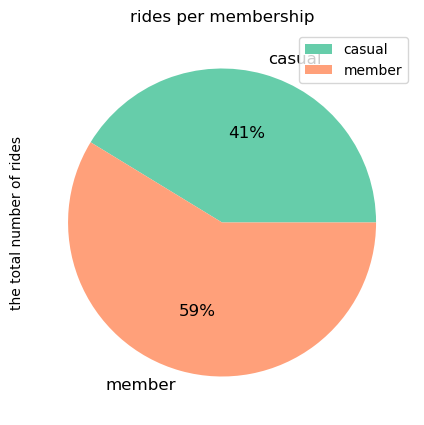

In [56]:
# rides per membership 

dg = biketrip.groupby('membership', as_index = True)[['ride_id']].count()
dg['ride_id'].plot.pie(x='membership', ylabel='the total number of rides', title='rides per membership', legend=True,
                       autopct='%1.0f%%', fontsize='12', startangle=0,colors = ['mediumaquamarine', 'lightsalmon'], figsize=(8, 5))
plt.show()

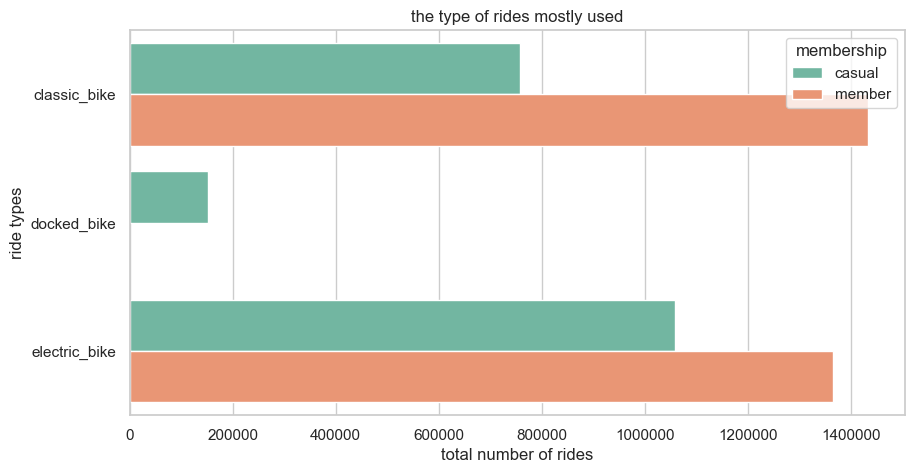

In [57]:
# type of rides used by memberships

dg1 = biketrip [['ride_type', 'membership', 'ride_id']]
dg1 = dg1.groupby(['ride_type', 'membership'], as_index = False)[['ride_id']].count()

plt.figure(figsize = (10,5))
sns.set_theme(style = 'whitegrid')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(data = dg1, x = 'ride_id', y = 'ride_type', hue = 'membership', 
            palette = 'Set2').set_title('the type of rides mostly used')

plt.xlabel('total number of rides')
plt.ylabel('ride types')
plt.show()

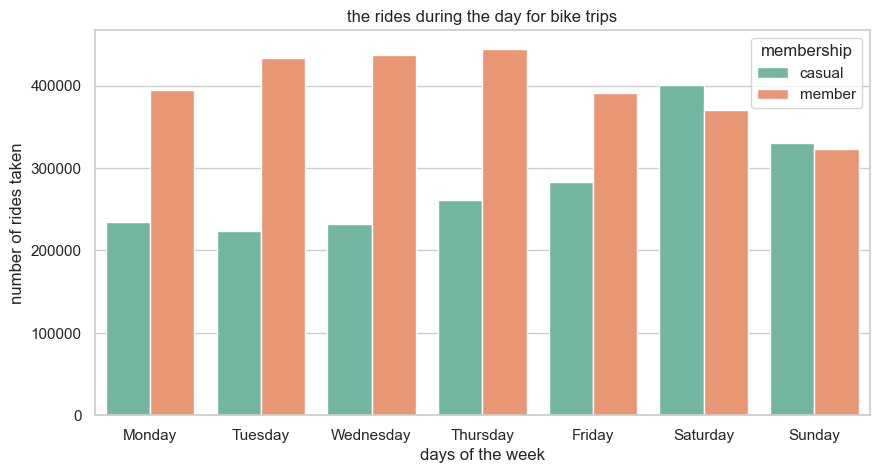

In [58]:
# rides during the week(membership)

dg2 = biketrip[['day', 'membership','ride_id']]
dg2 = dg2.groupby(['day','membership'], as_index = False)[['ride_id']].count()

plt.figure(figsize = (10,5))
sns.set_theme(style = 'whitegrid')
sns.barplot(data = dg2, x = 'day', y = 'ride_id', hue = 'membership', palette = 'Set2',
            order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).set_title('the rides during the day for bike trips'),

plt.xlabel('days of the week')
plt.ylabel('number of rides taken')
plt.show()

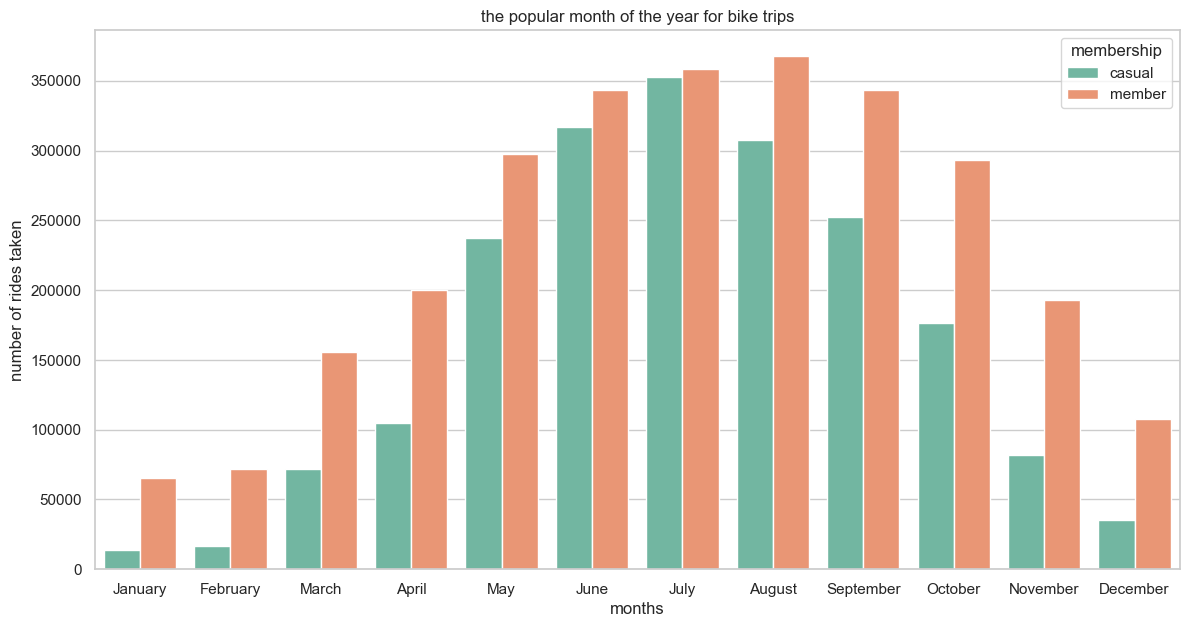

In [59]:
# rides per month(membership)

dg3 = biketrip[['month', 'membership', 'ride_id']]
dg3 = dg3.groupby(['month', 'membership'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (14,7))
sns.set_theme(style = 'whitegrid')
sns.barplot(data = dg3, x= 'month', y = 'ride_id', hue = 'membership', palette = 'Set2',
            order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
                   'October', 'November', 'December']).set_title('the popular month of the year for bike trips'),

plt.xlabel('months')
plt.ylabel('number of rides taken')
plt.show()

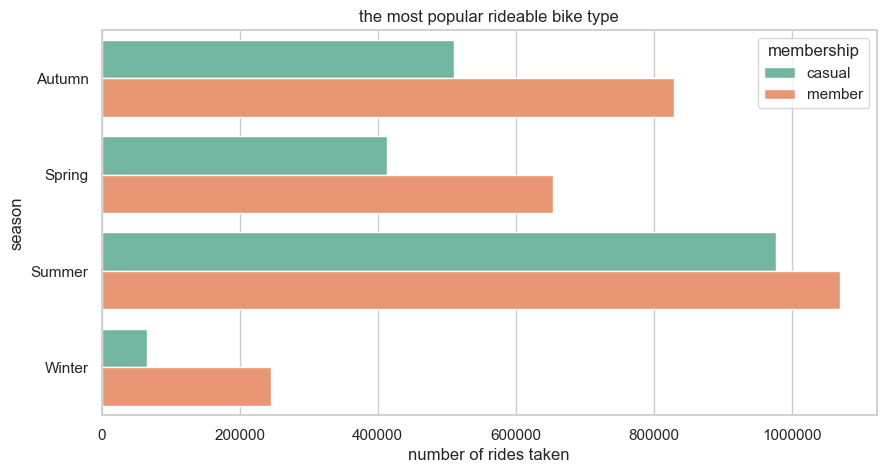

In [60]:
# rides per season 

dg4 = biketrip[['season', 'membership', 'ride_id']]
dg4 = dg4.groupby(['season', 'membership'], as_index=False)[['ride_id']].count()

plt.figure(figsize = (10,5))
sns.set_theme(style='whitegrid')
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(data=dg4, x='ride_id', y='season', hue='membership', palette='Set2').set_title('the most popular rideable bike type')

plt.xlabel('number of rides taken')
plt.ylabel('season')
plt.show()

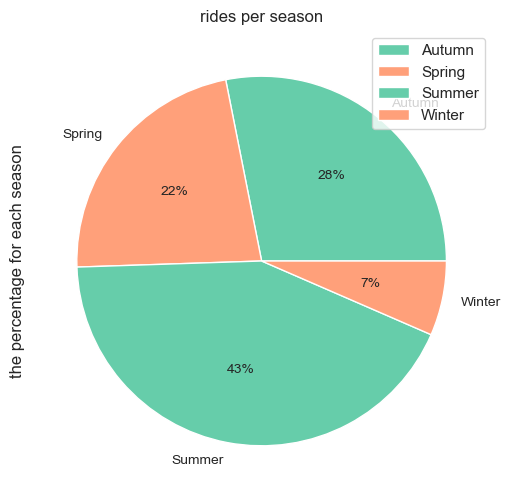

In [61]:
dg = biketrip.groupby('season', as_index = True)[['ride_id']].count()
dg['ride_id'].plot.pie(x='season', ylabel='the percentage for each season', title='rides per season', legend=True,
                       autopct='%1.0f%%', fontsize='10', startangle=0,colors = ['mediumaquamarine', 'lightsalmon'], figsize=(8, 6))
plt.show()